In [1]:
### Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Mean Variance std Deviation calculator

In [2]:
def calculate(list):
  
  if(len(list)!=9):
    raise ValueError('List must contain nine numbers.')
  else:
    arr=np.array(list)
    arr=np.reshape(arr,(3,3))
    calculations={}
    calculations['mean']=[np.mean(arr,axis=0).tolist(),np.mean(arr,axis=1).tolist(),np.mean(arr).tolist()]
    calculations['variance']=[np.var(arr,axis=0).tolist(),np.var(arr,axis=1).tolist(),np.var(arr).tolist()]
    calculations['standard deviation']=[np.std(arr,axis=0).tolist(),np.std(arr,axis=1).tolist(),np.std(arr).tolist()]
    calculations['max']=[np.max(arr,axis=0).tolist(),np.max(arr,axis=1).tolist(),np.max(arr).tolist()]
    calculations['min']=[np.min(arr,axis=0).tolist(),np.min(arr,axis=1).tolist(),np.min(arr).tolist()]
    calculations['sum']=[np.sum(arr,axis=0).tolist(),np.sum(arr,axis=1).tolist(),np.sum(arr).tolist()]
  return calculations

In [3]:
print(calculate([0,1,2,3,4,5,6,7,8]))


{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0], 'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667], 'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611], 'max': [[6, 7, 8], [2, 5, 8], 8], 'min': [[0, 1, 2], [0, 3, 6], 0], 'sum': [[9, 12, 15], [3, 12, 21], 36]}


### 2. Demographic data analysis

In [4]:
def calculate_demographic_data(print_data=True):
  # Read data from file
  df =pd.read_csv('adult.data.csv')
  # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
  race_count = df['race'].value_counts()
  #print(race_count)
  # What is the average age of men?
  #print(df['sex'])
  average_age_men = round(df.loc[df['sex']=='Male','age'].mean(),1)

  # What is the percentage of people who have a Bachelor's degree?
  percentage_bachelors = round(sum(df['education']=='Bachelors')*100/len(df.index),1)
  #print(df[['education','education-num']])
  # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
  # What percentage of people without advanced education make more than 50K?

  # with and without `Bachelors`, `Masters`, or `Doctorate`
  higher_education = sum((df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate'))

  lower_education = sum(((df['education']!='Bachelors') & (df['education']!='Masters') & (df['education']!='Doctorate')))

  # percentage with salary >50K
  #print(higher_education*len(df.index)/100)
  #print(sum((df['education-num']>=13)& (df['salary']=='>50K')))

  higher_education_rich = round( sum(((df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate')) & (df['salary']=='>50K'))*100/(higher_education) , 1)
  
  lower_education_rich = round( sum( ((df['education']!='Bachelors') & (df['education']!='Masters') & (df['education']!='Doctorate')) & (df['salary']=='>50K'))*100/(lower_education) , 1)
  
  #print(df.loc[10:60,['education','education-num','salary']])
  # What is the minimum number of hours a person works per week (hours-per-week feature)?
  min_work_hours = df['hours-per-week'].min()

  # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
  num_min_workers = sum(df['hours-per-week']==min_work_hours)

  rich_percentage = round( sum( (df['hours-per-week']==min_work_hours) & (df['salary']=='>50K'))*100/(num_min_workers) , 1)

  # What country has the highest percentage of people that earn >50K?
  temp=df.loc[df['salary']=='>50K','native-country']
  temp=temp.value_counts()
  
  temp1=df['native-country']
  temp1=temp1.value_counts()

  for c in temp.index:
    temp[c]=temp[c]*100/temp1[c]

  highest_earning_country =None
  max=temp[temp.index[0]]
  for c in temp.index:
    if temp[c]>=max:
      max=temp[c]
      highest_earning_country=c
    
  #print(type(temp.value_counts().index[0]))     
  highest_earning_country_percentage = round( max, 1)
  #print(len(df.index))
  # Identify the most popular occupation for those who earn >50K in India.
  top_IN_occupation = df.loc[(df['native-country']=='India') & (df['salary']=='>50K'),'occupation'].value_counts().index[0]

  # DO NOT MODIFY BELOW THIS LINE

  if print_data:
    print("Number of each race:\n", race_count)
    print("Average age of men:", average_age_men)
    print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
    print(
      f"Percentage with higher education that earn >50K: {higher_education_rich}%"
    )
    print(
      f"Percentage without higher education that earn >50K: {lower_education_rich}%"
    )
    print(f"Min work time: {min_work_hours} hours/week")
    print(
      f"Percentage of rich among those who work fewest hours: {rich_percentage}%"
    )
    print("Country with highest percentage of rich:", highest_earning_country)
    print(
      f"Highest percentage of rich people in country: {highest_earning_country_percentage}%"
    )
    print("Top occupations in India:", top_IN_occupation)

  return {
    'race_count': race_count,
    'average_age_men': average_age_men,
    'percentage_bachelors': percentage_bachelors,
    'higher_education_rich': higher_education_rich,
    'lower_education_rich': lower_education_rich,
    'min_work_hours': min_work_hours,
    'rich_percentage': rich_percentage,
    'highest_earning_country': highest_earning_country,
    'highest_earning_country_percentage': highest_earning_country_percentage,
    'top_IN_occupation': top_IN_occupation
  }

In [8]:
df=pd.read_csv('adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
calculate_demographic_data();

Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


### 3. Medical Data visualizer

In [21]:
# Import data
df = pd.read_csv('medical_examination.csv')
#print(df.loc[100:130,'cholesterol'])
# Add 'overweight' column
# print(df.loc[1:5,'weight'])
# print(df.loc[1:5,'height'])
BMI=pd.Series(df['weight']/((df['height']/100)**2))
# print(BMI.loc[1:5])
over_weight=pd.Series(BMI>25,dtype=int)
# over_weight=pd.Series(np.zeros(len(BMI.index),dtype=int),index=BMI.index)
# for c in BMI.index:
#   if BMI[c]>25:
#     over_weight[c]=1
# print(over_weight.loc[1:5])
df['overweight'] = over_weight
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
#print(df.loc[1:5,'cholesterol'])
df['cholesterol']=pd.Series(df['cholesterol']>1,dtype=int)
# print(df.loc[1:5,'cholesterol'])
df['gluc']=pd.Series(df['gluc']>1,dtype=int)
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat =pd.melt(df, id_vars=['cardio'],value_vars=[ 'active','alco','cholesterol','gluc','overweight','smoke'])
    # print(df_cat)

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    temp=df_cat.value_counts(sort=False)
    cardio=[]
    variable=[]
    value=[]
    total=[]
    for c in temp.index:
      cardio.append(c[0])
      variable.append(c[1])
      value.append(c[2])
      total.append(temp[c])
    # print(variable)
    df_cat =pd.DataFrame({'cardio':cardio,'variable':variable,'value':value,'total':total})
    # print(df_cat)

    # Draw the catplot with 'sns.catplot()'
    g=sns.catplot(data=df_cat,x='variable',y='total',kind='bar',col='cardio',hue='value')  


    # Get the figure for the output
    #fig= g.figure
  
    # Do not modify the next two lines
    #fig.savefig('catplot.png')
#     return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    # print(df.info())
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = round(df_heat.corr(),1)
    # print(corr)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,6))

    # Draw the heatmap with 'sns.heatmap()'
    g=sns.heatmap(corr, annot=True,linewidth=0.7,mask=mask,cbar_kws={"shrink": .5},fmt='.1f')
    #fig=g.figure

    # Do not modify the next two lines
    #fig.savefig('heatmap.png')
#     return fig


In [18]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


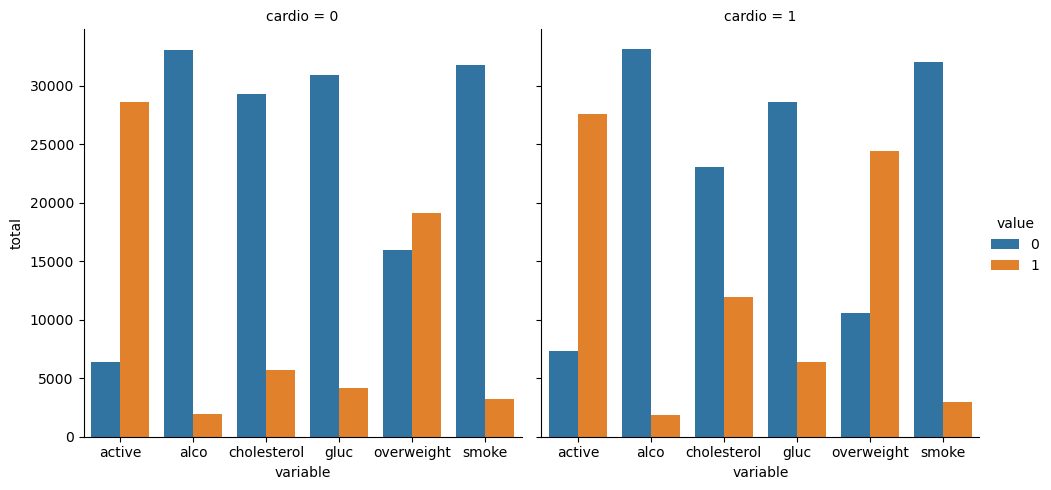

In [19]:
draw_cat_plot()

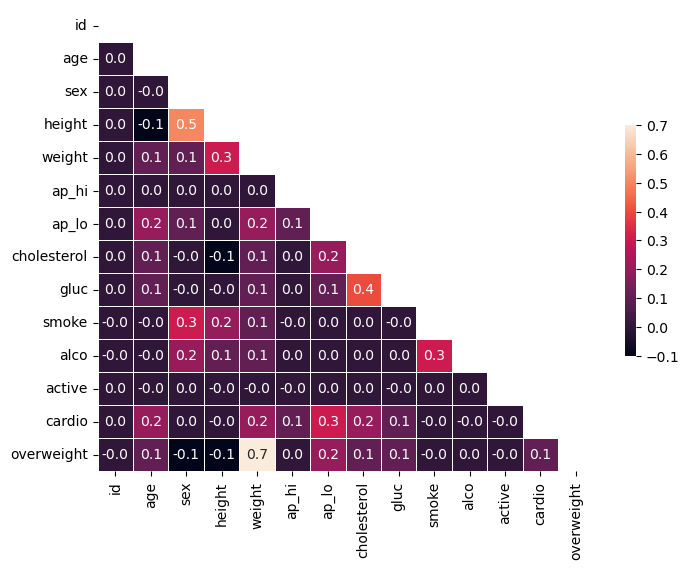

In [22]:
draw_heat_map()

### 4. Page View time series visualiser

In [41]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',index_col=0,
    parse_dates=True)
# print(df.head())
# print(df.info())
# Clean data
df = df[( df['value']>=df['value'].quantile(0.025) ) & ( df['value']<=df['value'].quantile(0.975) )]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(df,c='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['year'] = [d.year for d in df_bar.date]
    df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

    # print(df_bar.info())

    bar1=pd.DataFrame({})
    bar1.index=df_bar['year'].unique()
    for m in ['January','February','March','April','May','June','July','August','September','October','November','December']:
      bar1[m]=''
    # print(bar1.index)

    for i in bar1.index:
      for m in bar1.columns:
        sum=0
        n=0
        temp=0
        for j in df_bar[(df_bar['year']==i) & (df_bar['month']==m)].index :
          sum+=df_bar.loc[j,'value']
          n+=1
          temp=1
        if temp==1:
          bar1.loc[i,m]=sum/n
        else:
          bar1.loc[i,m]=None
          
    # Draw bar plot
#     fig , ax= plt.subplots(figsize=(12,20))
    bar1.plot(kind='bar').figure
    plt.legend(title='Months',prop={'size': 8})
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
#     fig.savefig('bar_plot.png')
#     return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # print(df_box.head())

    # Draw box plots (using Seaborn)
    fig=plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    sns.boxplot(data=df_box, x='year' , y='value')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
  
    ax2=fig.add_subplot(1,2,2)
    sns.boxplot(data=df_box, x='month' , y='value' , order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    # Save image and return fig (don't change this part)
#     fig.savefig('box_plot.png')
#     return fig


In [24]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


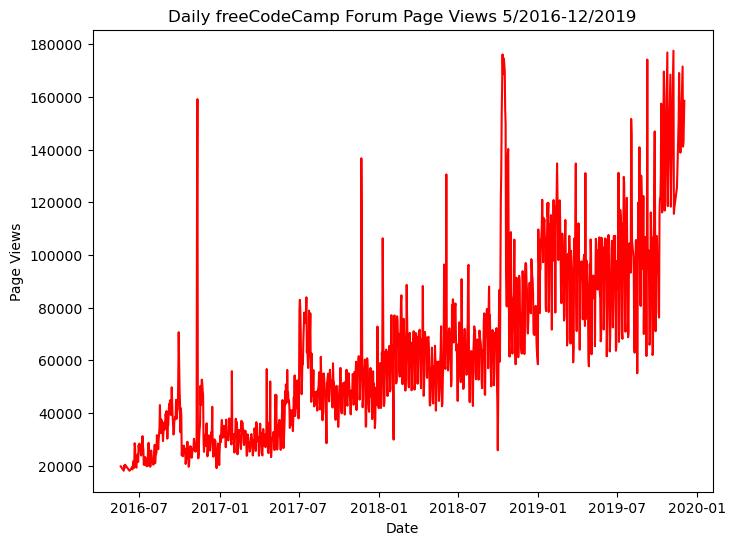

In [36]:
draw_line_plot();

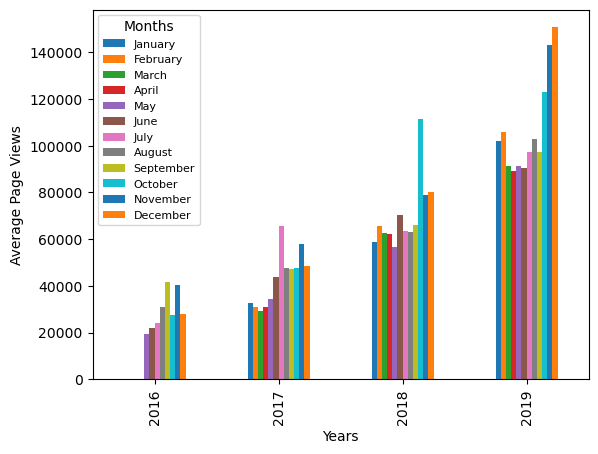

In [30]:
draw_bar_plot()

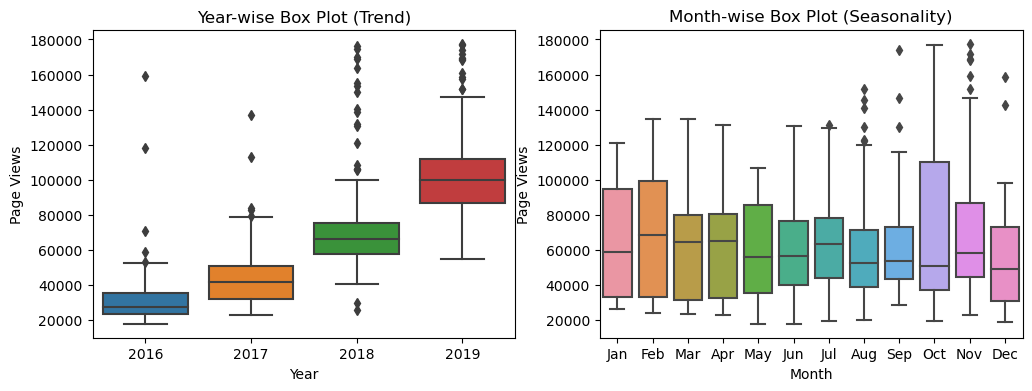

In [43]:
draw_box_plot()

### 5. Sea levelpredictor

In [44]:
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df=pd.read_csv('epa-sea-level.csv')
    # print(df.head())
    # Create scatter plot
    df.plot.scatter(x='Year',y='CSIRO Adjusted Sea Level',c='red',label='data')


    # Create first line of best fit
    res=linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
    # res=linregress(df.loc[df['Year']<2000,'Year'],df.loc[df['Year']<2000,'CSIRO Adjusted Sea Level'])
    # print(res)
    slope=res.slope
    intercept=res.intercept
    # print(slope,'\t',intercept)
    # print(1880*slope+intercept)
    x=[]
    for i in range(171):
      x.append(1880+i)
    x=pd.array(x)
    plt.plot(x, slope*x+intercept,c='green',label='all time')
    # Create second line of best fit
    res=linregress(df.loc[df['Year']>=2000,'Year'],df.loc[df['Year']>=2000,'CSIRO Adjusted Sea Level'])
    slope=res.slope
    intercept=res.intercept
    x=[]
    for i in range(51):
      x.append(2000+i)
    x=pd.array(x)
    plt.plot(x, slope*x+intercept,c='blue',label='from 2000 onwards')
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
    plt.legend()
    
    # Save plot and return data for testing (DO NOT MODIFY)
#     plt.savefig('sea_level_plot.png')
#     return plt.gca()

In [45]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


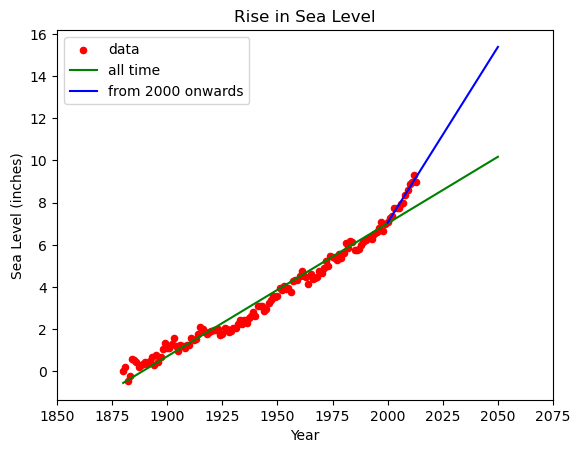

In [47]:
draw_plot();